In [75]:
import matplotlib.pyplot as plt #criar gráficos
import seaborn as sns #criar gráficos
import pandas as pd #importar dados e trabalhar com DataFrame
from scipy import stats # estatística chi2
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings #Tirando os avisos/erros
import scipy.cluster.hierarchy as sch #gerar o dendograma
import numpy as np

### Importando os Dados

In [76]:
dados = pd.read_csv('E-commerce Customer Behavior - Sheet1.csv', sep = ',')
dados.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


### Data Warilling

In [77]:
dados.shape

(350, 11)

In [78]:
dados.isna().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [79]:
dados.drop(columns=['Customer ID'], inplace= True)
dados.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [80]:
dados = dados.dropna()
dados.shape

(348, 10)

In [81]:
dados.columns = dados.columns.str.replace(' ', '_')
dados.head()

,Gender,Age,City,Membership_Type,Total_Spend,Items_Purchased,Average_Rating,Discount_Applied,Days_Since_Last_Purchase,Satisfaction_Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [82]:
dados['Satisfaction_Level'].unique()

array(['Satisfied', 'Neutral', 'Unsatisfied'], dtype=object)

In [83]:
dados.loc[dados['Satisfaction_Level']=='Satisfied',
                            'NivelDeSatisfacao'] = 2 #categoria de referência
dados.loc[dados['Satisfaction_Level']=='Neutral',
                            'NivelDeSatisfacao'] = 1
dados.loc[dados['Satisfaction_Level']=='Unsatisfied',
                            'NivelDeSatisfacao'] = 0

dados

,Gender,Age,City,Membership_Type,Total_Spend,Items_Purchased,Average_Rating,Discount_Applied,Days_Since_Last_Purchase,Satisfaction_Level,NivelDeSatisfacao
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,2.0
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,1.0
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,0.0
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,2.0
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,0.0
...,...,...,...,...,...,...,...,...,...,...,...
345,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied,0.0
346,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral,1.0
347,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied,2.0
348,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral,1.0


In [84]:
dados = pd.get_dummies(dados, columns=['City','Membership_Type','Discount_Applied','Gender'], drop_first= True)
dados.head()

,Age,Total_Spend,Items_Purchased,Average_Rating,Days_Since_Last_Purchase,Satisfaction_Level,NivelDeSatisfacao,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership_Type_Gold,Membership_Type_Silver,Discount_Applied_True,Gender_Male
0,29,1120.20,14,4.6,25,Satisfied,2.0,0,0,0,1,0,1,0,1,0
1,34,780.50,11,4.1,18,Neutral,1.0,0,1,0,0,0,0,1,0,1
2,43,510.75,9,3.4,42,Unsatisfied,0.0,0,0,0,0,0,0,0,1,0
3,30,1480.30,19,4.7,12,Satisfied,2.0,0,0,0,0,1,1,0,0,1
4,27,720.40,13,4.0,55,Unsatisfied,0.0,0,0,1,0,0,0,1,1,1


In [85]:
dadosPadronizados = dados.drop(columns='Satisfaction_Level')
padronizar=StandardScaler()
dadosPadronizados = pd.DataFrame(padronizar.fit_transform(dadosPadronizados),columns = dadosPadronizados.columns)

dadosPadronizados.head()

,Age,Total_Spend,Items_Purchased,Average_Rating,Days_Since_Last_Purchase,NivelDeSatisfacao,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership_Type_Gold,Membership_Type_Silver,Discount_Applied_True,Gender_Male
0,-0.939761,0.754230,0.330381,0.996757,-0.120022,1.171147,-0.437928,-0.451832,-0.447214,2.213211,-0.447214,1.405119,-0.711684,0.994269,-1.005764
1,0.086720,-0.186319,-0.394236,0.132172,-0.640260,-0.031092,-0.437928,2.213211,-0.447214,-0.451832,-0.447214,-0.711684,1.405119,-1.005764,0.994269
2,1.934386,-0.933192,-0.877314,-1.078247,1.143413,-1.233332,-0.437928,-0.451832,-0.447214,-0.451832,-0.447214,-0.711684,-0.711684,0.994269,-1.005764
3,-0.734465,1.751261,1.538076,1.169674,-1.086179,1.171147,-0.437928,-0.451832,-0.447214,-0.451832,2.236068,1.405119,-0.711684,-1.005764,0.994269
4,-1.350354,-0.352721,0.088842,-0.040745,2.109570,-1.233332,-0.437928,-0.451832,2.236068,-0.451832,-0.447214,-0.711684,1.405119,0.994269,0.994269


In [86]:
dadosPadronizados.isna().sum()

Age                         0
Total_Spend                 0
Items_Purchased             0
Average_Rating              0
Days_Since_Last_Purchase    0
NivelDeSatisfacao           0
City_Houston                0
City_Los Angeles            0
City_Miami                  0
City_New York               0
City_San Francisco          0
Membership_Type_Gold        0
Membership_Type_Silver      0
Discount_Applied_True       0
Gender_Male                 0
dtype: int64

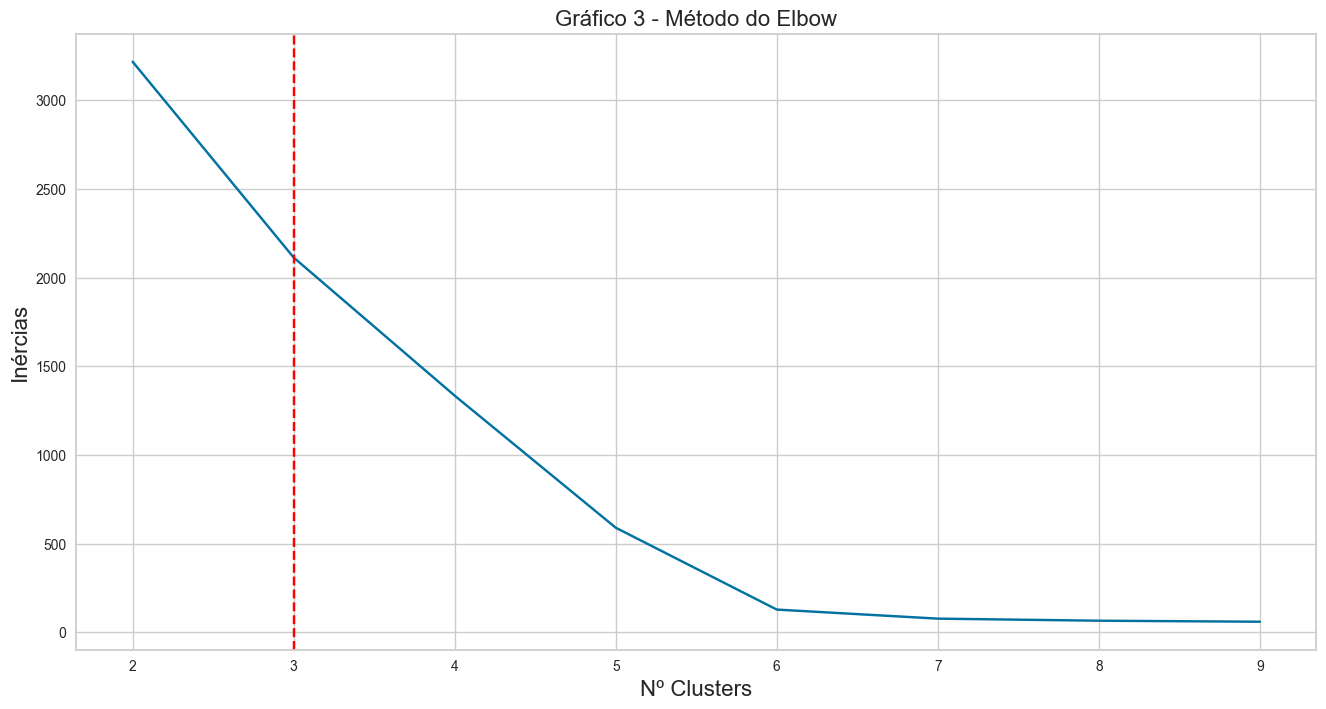

In [87]:
warnings.filterwarnings("ignore", category=FutureWarning)

inercias = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dadosPadronizados)
    inercias.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, inercias, 'bx-')
#plt.axhline(y = 1300, color = 'red', linestyle = '--')
plt.axvline(x = 3, color = 'red', linestyle = '--')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Inércias', fontsize=16)
plt.title('Gráfico 3 - Método do Elbow', fontsize=16)
plt.show()

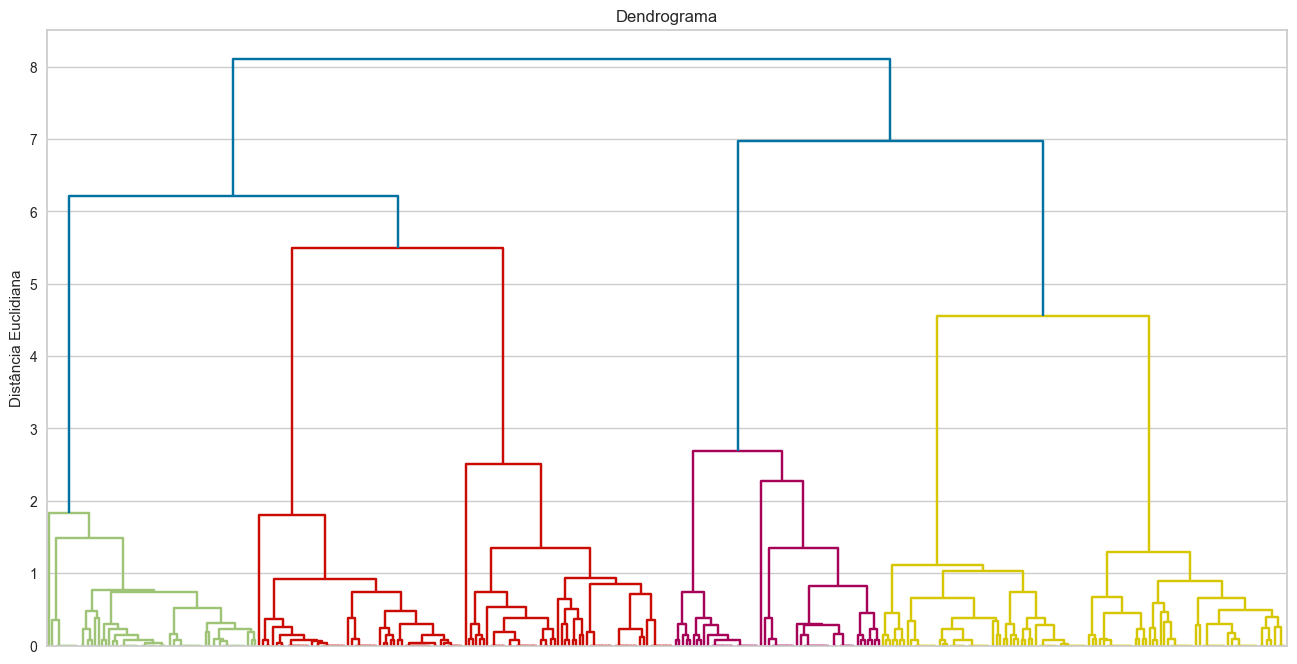

In [88]:
plt.figure(figsize=(16,8))
dendrogram = sch.dendrogram(sch.linkage(dadosPadronizados, method = 'complete', metric = 'euclidean'))
plt.axhline(y = 60, color = 'red', linestyle = '--')
plt.title('Dendrograma')
plt.xticks([]) # Procedimento para retirar os pontos do eixo x quando existirem muitas observações
plt.ylabel('Distância Euclidiana')
plt.show()

In [89]:
kmeans = KMeans(n_clusters= 3, verbose= True)

kmeans.fit(dadosPadronizados)


dados['clusters'] = kmeans.predict(dadosPadronizados)

Initialization complete
Iteration 0, inertia 4109.912586258535.
Iteration 1, inertia 2377.4886764318157.
Iteration 2, inertia 2112.9706339036857.
Iteration 3, inertia 2112.6541709597686.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 4012.8413848352084.
Iteration 1, inertia 2112.6541709597686.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3954.3652611240786.
Iteration 1, inertia 2147.6990827436725.
Iteration 2, inertia 2112.6541709597686.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3932.251653637235.
Iteration 1, inertia 2112.6541709597686.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4908.503934236549.
Iteration 1, inertia 2371.542257223639.
Iteration 2, inertia 2315.8869943214095.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 5494.178119113658.
Iteration 1, ine

In [90]:
kmeans.cluster_centers_

array([[-0.75025698,  1.2829093 ,  1.20363749,  1.12681468, -0.64470676,
         1.17114691, -0.43792787, -0.4518321 , -0.4472136 ,  0.89207877,
         0.88296018,  1.40511885, -0.71168357,  0.00279993,  0.00279993],
       [ 1.19603994, -1.03432459, -0.99384619, -1.20565962,  0.38391788,
        -0.64275801,  0.89890458, -0.4518321 , -0.4472136 , -0.4518321 ,
        -0.4472136 , -0.71168357, -0.71168357,  0.01179693, -1.00576374],
       [-0.41511527, -0.27510586, -0.23527454,  0.04793059,  0.27063293,
        -0.54486988, -0.43792787,  0.89207877,  0.88296018, -0.4518321 ,
        -0.4472136 , -0.71168357,  1.40511885, -0.01429437,  0.97717499]])

In [91]:
def teste_f_kmeans(kmeans, dataframe):
    
    variaveis = dataframe.columns

    centroides = pd.DataFrame(kmeans.cluster_centers_)
    centroides.columns = dataframe.columns
    centroides
    
    print("Centróides: \n", centroides ,"\n")

    df = dataframe[variaveis]

    unique, counts = np.unique(kmeans.labels_, return_counts=True)

    dic = dict(zip(unique, counts))

    qnt_clusters = kmeans.n_clusters

    observacoes = len(kmeans.labels_)

    df['cluster'] = kmeans.labels_

    output = []

    for variavel in variaveis:

        dic_var={'variavel':variavel}

        # variabilidade entre os grupos

        variabilidade_entre_grupos = np.sum([dic[index]*np.square(observacao - df[variavel].mean()) for index, observacao in enumerate(centroides[variavel])])/(qnt_clusters - 1)

        dic_var['variabilidade_entre_grupos'] = variabilidade_entre_grupos

        variabilidade_dentro_dos_grupos = 0

        for grupo in unique:

            grupo = df[df.cluster == grupo]

            variabilidade_dentro_dos_grupos += np.sum([np.square(observacao - grupo[variavel].mean()) for observacao in grupo[variavel]])/(observacoes - qnt_clusters)

        dic_var['variabilidade_dentro_dos_grupos'] = variabilidade_dentro_dos_grupos

        dic_var['F'] =  dic_var['variabilidade_entre_grupos']/dic_var['variabilidade_dentro_dos_grupos']
        
        dic_var['sig F'] =  1 - stats.f.cdf(dic_var['F'], qnt_clusters - 1, observacoes - qnt_clusters)

        output.append(dic_var)

    df = pd.DataFrame(output)
    
    print(df)

    return df

# Os valores da estatística F são bastante sensíveis ao tamanho da amostra



In [92]:
output = teste_f_kmeans(kmeans,dadosPadronizados)
output

Centróides: 
         Age  Total_Spend  Items_Purchased  Average_Rating  \
0 -0.750257     1.282909         1.203637        1.126815   
1  1.196040    -1.034325        -0.993846       -1.205660   
2 -0.415115    -0.275106        -0.235275        0.047931   

   Days_Since_Last_Purchase  NivelDeSatisfacao  City_Houston  \
0                 -0.644707           1.171147     -0.437928   
1                  0.383918          -0.642758      0.898905   
2                  0.270633          -0.544870     -0.437928   

   City_Los Angeles  City_Miami  City_New York  City_San Francisco  \
0         -0.451832   -0.447214       0.892079            0.882960   
1         -0.451832   -0.447214      -0.451832           -0.447214   
2          0.892079    0.882960      -0.451832           -0.447214   

   Membership_Type_Gold  Membership_Type_Silver  Discount_Applied_True  \
0              1.405119               -0.711684               0.002800   
1             -0.711684               -0.711684        

,variavel,variabilidade_entre_grupos,variabilidade_dentro_dos_grupos,F,sig F
0,Age,124.548721,2.866741e-01,4.344610e+02,1.110223e-16
1,Total_Spend,161.690221,7.136104e-02,2.265805e+03,1.110223e-16
2,Items_Purchased,144.290317,1.722300e-01,8.377767e+02,1.110223e-16
3,Average_Rating,157.268568,9.699381e-02,1.621429e+03,1.110223e-16
4,Days_Since_Last_Purchase,37.001403,7.941948e-01,4.658983e+01,1.110223e-16
5,NivelDeSatisfacao,121.154252,3.063522e-01,3.954738e+02,1.110223e-16
6,City_Houston,68.496035,6.116172e-01,1.119917e+02,1.110223e-16
7,City_Los Angeles,70.134150,6.021209e-01,1.164785e+02,1.110223e-16
8,City_Miami,68.707692,6.103902e-01,1.125636e+02,1.110223e-16
9,City_New York,70.134150,6.021209e-01,1.164785e+02,1.110223e-16


In [93]:
dados

,Age,Total_Spend,Items_Purchased,Average_Rating,Days_Since_Last_Purchase,Satisfaction_Level,NivelDeSatisfacao,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership_Type_Gold,Membership_Type_Silver,Discount_Applied_True,Gender_Male,clusters
0,29,1120.20,14,4.6,25,Satisfied,2.0,0,0,0,1,0,1,0,1,0,0
1,34,780.50,11,4.1,18,Neutral,1.0,0,1,0,0,0,0,1,0,1,2
2,43,510.75,9,3.4,42,Unsatisfied,0.0,0,0,0,0,0,0,0,1,0,1
3,30,1480.30,19,4.7,12,Satisfied,2.0,0,0,0,0,1,1,0,0,1,0
4,27,720.40,13,4.0,55,Unsatisfied,0.0,0,0,1,0,0,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,32,660.30,10,3.8,42,Unsatisfied,0.0,0,0,1,0,0,0,1,1,1,2
346,36,470.50,8,3.0,27,Neutral,1.0,1,0,0,0,0,0,0,0,0,1
347,30,1190.80,16,4.5,28,Satisfied,2.0,0,0,0,1,0,1,0,1,0,0
348,34,780.20,11,4.2,21,Neutral,1.0,0,1,0,0,0,0,1,0,1,2


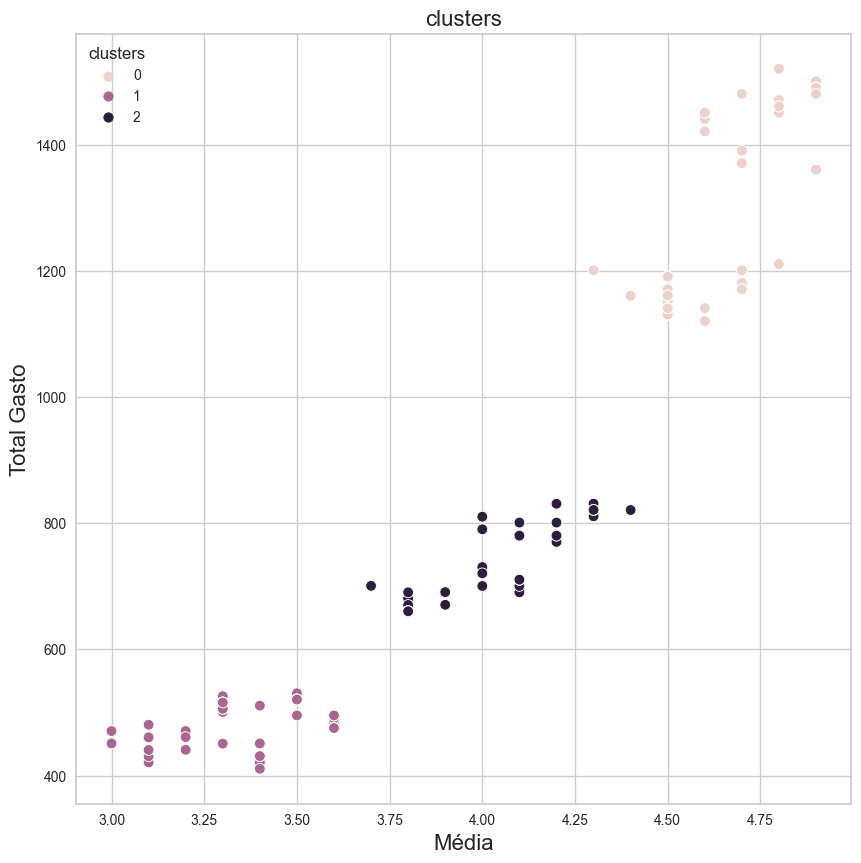

In [94]:
plt.figure(figsize=(10,10))

fig = sns.scatterplot(x='Average_Rating', y='Total_Spend', s=60, data=dados, hue='clusters')
plt.title('clusters', fontsize=16)
plt.xlabel('Média', fontsize=16)
plt.ylabel('Total Gasto', fontsize=16)
plt.show()